## Importing all the necessary Dependencies

In [2]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pickle

## Reading the dataset

In [4]:
data = pd.read_csv('labeled_data.csv')

In [5]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
data.shape

(24783, 7)

## Checking for null values in the dataset

In [7]:
data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

## Counting the total number of labels present in the dataset

In [8]:
each_label_count = data['class'].value_counts()

In [9]:
each_label_count

class
1    19190
2     4163
0     1430
Name: count, dtype: int64

## Preprocessing all the news texts

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
ps = PorterStemmer()

In [13]:
def preprocess_text(text):

  text = text.lower()

  text = nltk.word_tokenize(text)

  word_arr = []

  for i in text:
    if i.isalnum():
      word_arr.append(i)

  text = word_arr[:]

  word_arr.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      word_arr.append(i)

  text = word_arr[:]

  word_arr.clear()

  for i in text:
    word_arr.append(ps.stem(i))

  return " ".join(word_arr)

## Creating a new column in the dataset and inserting all the pre-proccessed texts inside it

In [14]:
data['preprocessed_tweet'] = data['tweet'].apply(preprocess_text)

In [15]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,preprocessed_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dat cold tyga dwn bad cuffin da...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt look like tranni
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...


## Dropping the plain un-proccessed 'news_text' and the 'label' column

In [16]:
data.drop(columns=['class', 'tweet'], inplace=True)

In [17]:
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,preprocessed_tweet
0,0,3,0,0,3,rt mayasolov woman complain clean hous amp man...
1,1,3,0,3,0,rt mleew17 boy dat cold tyga dwn bad cuffin da...
2,2,3,0,3,0,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...
3,3,3,0,2,1,rt look like tranni
4,4,6,0,6,0,rt shenikarobert shit hear might true might fa...


## Initializing TfidfVectorizer

In [18]:
vectorizer = TfidfVectorizer()

## Vectorizing all the pre-proccessed news texts

In [19]:
X = vectorizer.fit_transform(data['preprocessed_tweet']).toarray()

## Applying Principal Component Analysis(PCA) on the vectorized text to reduce it from high dimension to low dimension

In [20]:
pca = PCA(n_components=2, random_state=42)

In [21]:
X = pca.fit_transform(X)

## Implementing k-means algorithm and finding the optimal number of clusters for k-means algorithm

In [22]:
wcss = []

for i in range(1, 11):

  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)

  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [23]:
wcss

[443.292532576445,
 237.22435110525277,
 145.95503753945655,
 100.8756866929385,
 75.1017353376925,
 60.15944376159283,
 50.03431790403562,
 40.78870439687975,
 32.111126908269725,
 28.15771525907998]

## Plotting the elbow point graph of the k-means algorithm

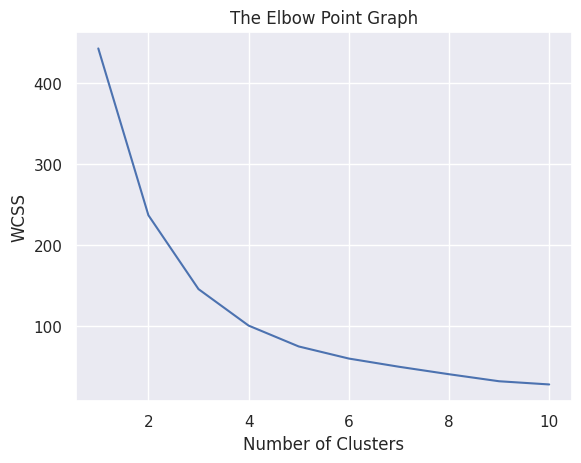

In [24]:
sns.set()

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

### In this elbow graph, we can see that after n_clusters=6, the graph is getting stabilized. Therefore, the optimal number of clusters for k-means is 6

## Training the model with the optimal number of clusters found in the elbow point graph

In [25]:
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)

In [26]:
kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, ..., 0, 2, 0], dtype=int32)

In [27]:
kmeans_labels = kmeans.labels_

In [28]:
kmeans_labels

array([0, 0, 2, ..., 0, 2, 0], dtype=int32)

## Plotting the clusters as a scatter plot

Text(0.5, 1.0, 'Kmeans Clustering')

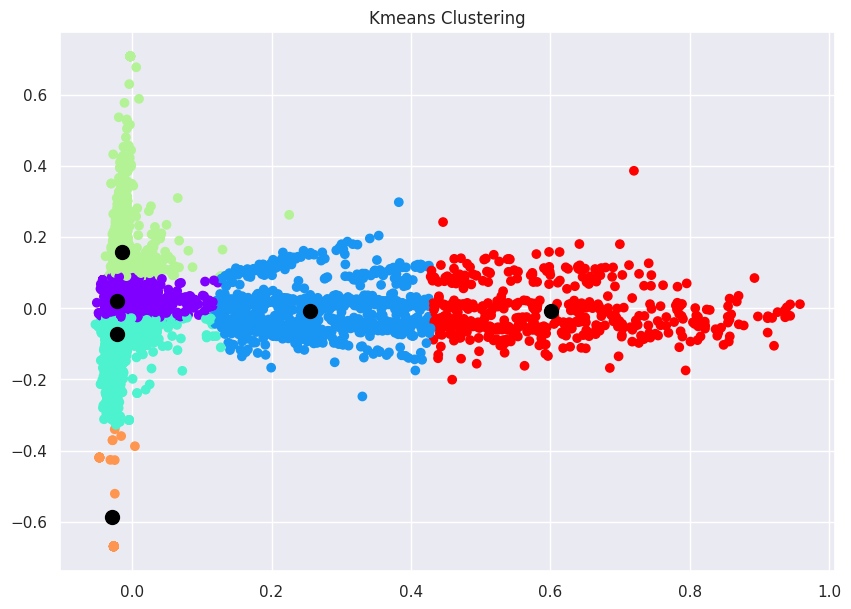

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.title('Kmeans Clustering')

## Checking the quality of the cluster of kmeans with the help of silhouette score

In [30]:
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)

In [31]:
silhouette_score_kmeans

0.6168609637211533

## Implementing K-medoids and finding the optimal number of clusters for k-medoids algorithm

In [32]:
wcss = []

for i in range(1, 11):

    kmedoids = KMedoids(n_clusters=i, init='k-medoids++', random_state=42)

    kmedoids.fit(X)

    wcss.append(kmedoids.inertia_)

In [33]:
wcss

[1983.4698616793487,
 1673.2961253023561,
 1593.5706119435883,
 1019.0017536894508,
 917.4495636638095,
 632.8374314383408,
 580.0788444223042,
 556.782460257845,
 522.1294482145987,
 497.0317598067359]

## Plotting the elbow point graph of the k-medoids algorithm

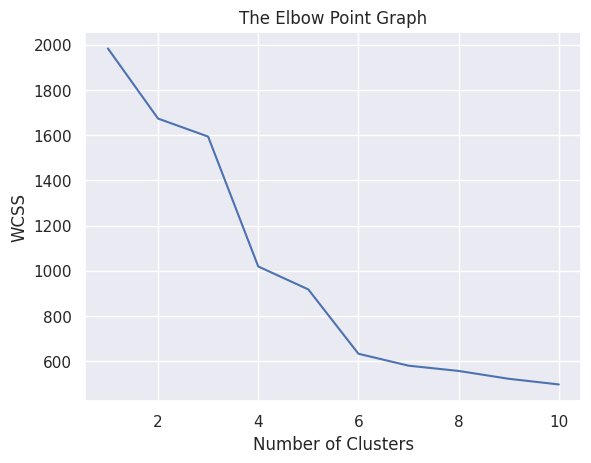

In [34]:
sns.set()

plt.plot(range(1, 11), wcss)

plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.show()

### In this elbow graph, we can see that after n_clusters=6, the graph is getting stabilized. Therefore, the optimal number of clusters for k-medoid is 6

## Training the model with the optimal number of clusters found in the elbow point graph

In [35]:
kmedoids = KMedoids(n_clusters=6, random_state=42)

In [36]:
kmedoids.fit_predict(X)

array([1, 1, 3, ..., 5, 0, 5])

In [37]:
kmediod_labels = kmedoids.labels_

In [38]:
kmediod_labels

array([1, 1, 3, ..., 5, 0, 5])

## Plotting the clusters as a scatter plot

Text(0.5, 1.0, 'Kmedoid Clustering')

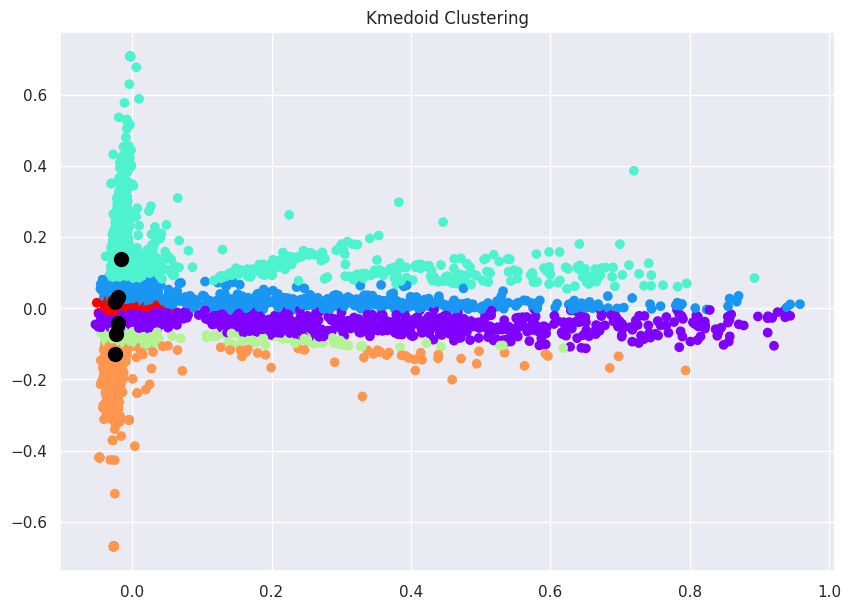

In [39]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=kmediod_labels, cmap='rainbow')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], s=100, c='black', label='centroid')
plt.title('Kmedoid Clustering')

## Checking the quality of the cluster of kmedoid with the help of silhouette score

In [40]:
silhouette_score_kmedoid = silhouette_score(X, kmediod_labels)

In [41]:
silhouette_score_kmedoid

0.23376530045722385

## Implementing Agglomerative Hierarical Clustering Algorithm and finding the optimal number of clusters for agglomerative hierarical clustering algorithm

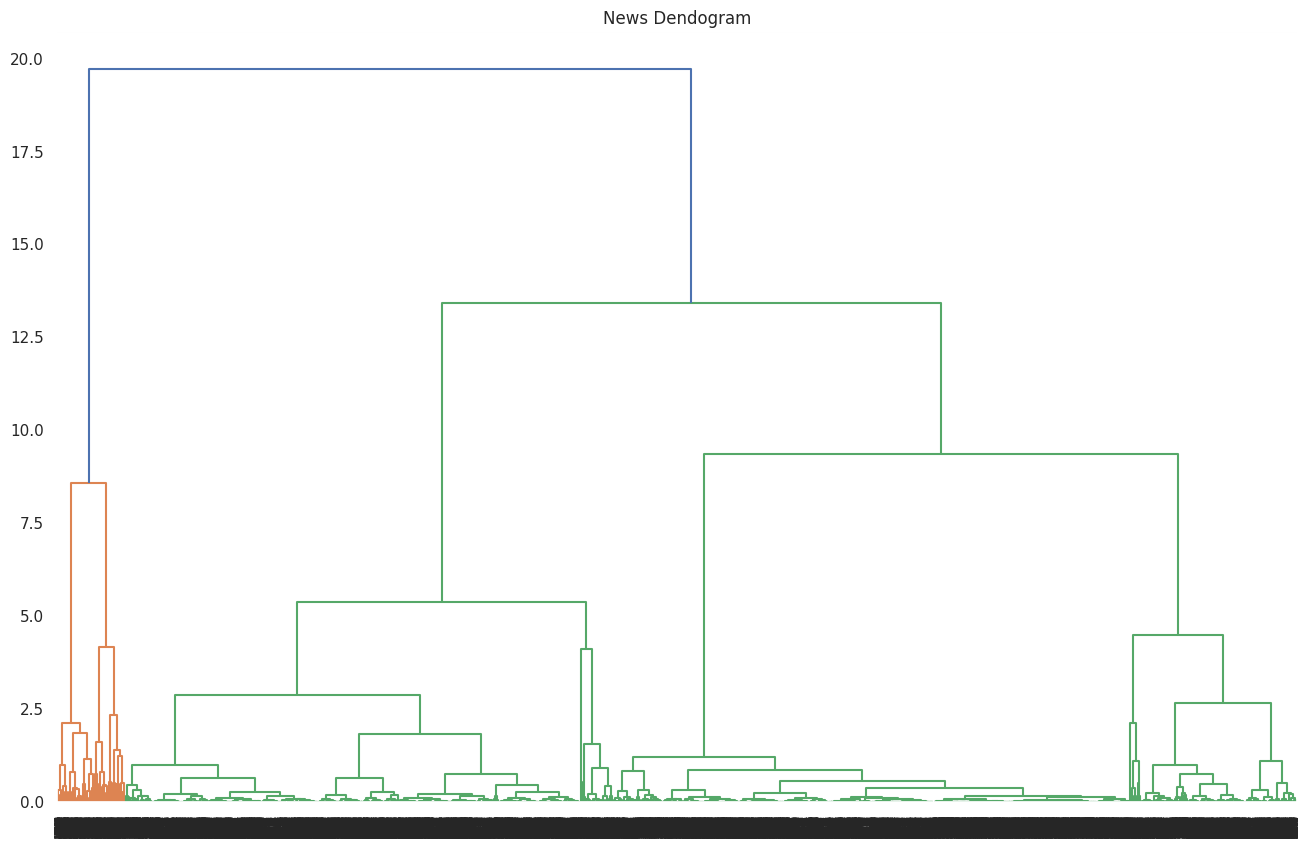

In [42]:
plt.figure(figsize=(16, 10))

plt.title('News Dendogram')

dend = shc.dendrogram(shc.linkage(X, method='ward'))

### By cutting the dendrogram horizontally along the longest line, we get 3 clusters, indicating that the optimal number of clusters for agglomerative clustering is 3.

## Training the model with the optimal number of clusters found from the dendogram

In [43]:
cluster_hierarcial = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [44]:
cluster_hierarcial.fit_predict(X)

array([0, 0, 2, ..., 0, 2, 0])

In [45]:
hiearachy_labels = cluster_hierarcial.labels_

## Plotting the clusters as a scatter plot

Text(0.5, 1.0, 'Agglomerative Hierarical Clustering')

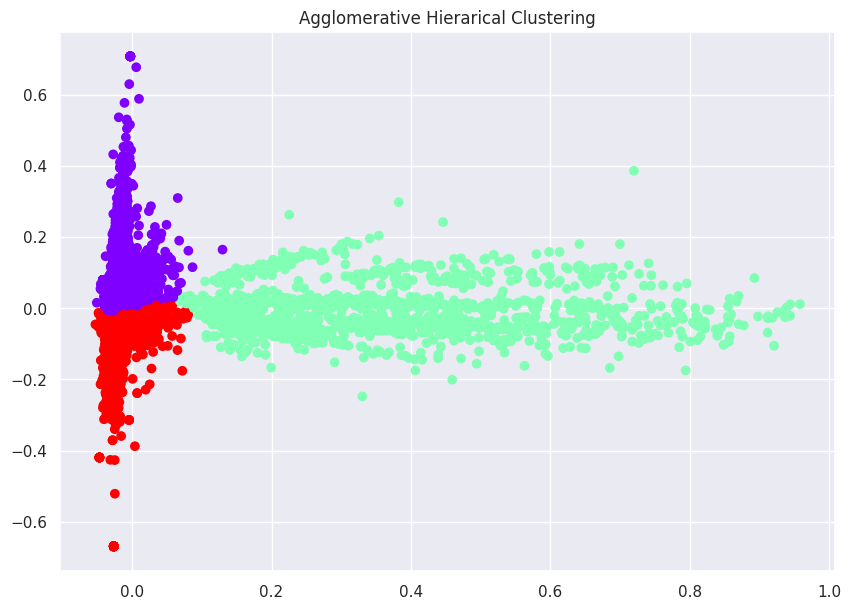

In [46]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=hiearachy_labels, cmap='rainbow')
plt.title('Agglomerative Hierarical Clustering')

## Checking the quality of the cluster of agglomerative hierarical with the help of silhouette score

In [47]:
silhouette_score_hierarchy = silhouette_score(X, hiearachy_labels)

In [48]:
silhouette_score_hierarchy

0.5410941460038762

## Creating a table of the silhouette score of the three algorithm for better comparison

In [49]:
silhoutte_score_df = pd.DataFrame({
    'Algorithm': ['k-means Clustering', 'k-medoids Clustering', 'Agglomerative Hierarical Clustering'],
    'Silhouette Score': [silhouette_score_kmeans, silhouette_score_kmedoid, silhouette_score_hierarchy]
})

In [50]:
silhoutte_score_df

,Algorithm,Silhouette Score
0,k-means Clustering,0.616861
1,k-medoids Clustering,0.233765
2,Agglomerative Hierarical Clustering,0.541094


Text(0.5, 1.0, 'Silhouette Score of each Algorithm')

<Figure size 1200x800 with 0 Axes>

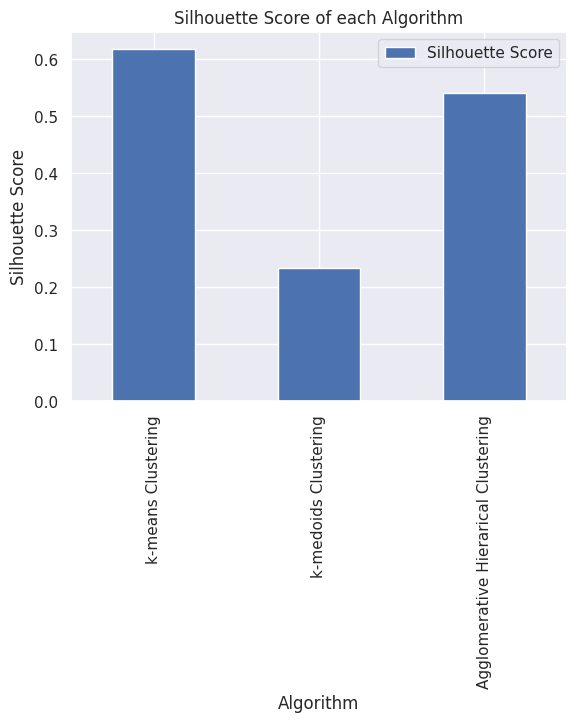

In [51]:
plt.figure(figsize=(12, 8))

silhoutte_score_df.plot(kind='bar', x='Algorithm')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score of each Algorithm')

## Conclusion

From the table and the graph, it is clear that the silhouette score of Agglomerative Hierarical Clustering is highest among the three indicating that it is the best clustering algorithm for our use case.

Therefore, for this project, THE OPTIMAL NUMBER OF CLUSTERS IS 3.

## Testing the model with sample data

### Using K-Means Algorithm to make prediction on SIngle Input

In [52]:
message = 'Well im glad that i live in Serbia, everyone are welcome here!'
message_preproccessed = preprocess_text(message)
message_vectorized = vectorizer.transform([message_preproccessed]).toarray()
message_pca = pca.transform(message_vectorized)

kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)

kmeans.fit_predict(X)

pred_single_data = kmeans.predict(message_pca)

pred_single_data[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1

In [53]:
message = 'shit blow claim faith somebodi still fuck hoe 128514 128514 128514'
message_preproccessed = preprocess_text(message)
message_vectorized = vectorizer.transform([message_preproccessed]).toarray()
message_pca = pca.transform(message_vectorized)

kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)

kmeans.fit_predict(X)

pred_single_data = kmeans.predict(message_pca)

pred_single_data[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2

In [54]:
message = 'check 12th man cowboysn even faggot ny fan stand'
message_preproccessed = preprocess_text(message)
message_vectorized = vectorizer.transform([message_preproccessed]).toarray()
message_pca = pca.transform(message_vectorized)

kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)

kmeans.fit_predict(X)

pred_single_data = kmeans.predict(message_pca)

pred_single_data[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1

## Generating pickle file of both the models, the pca and the vectorizer

In [55]:
pickle.dump(kmeans, open('modelkmeans.pkl', 'wb'))
pickle.dump(cluster_hierarcial, open('modelhierarchy.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(pca, open('pca.pkl', 'wb'))

## Generating new file with predict labels

In [57]:
import pandas as pd
import pickle

# Load the saved models
kmeans = pickle.load(open('modelkmeans.pkl', 'rb'))
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
pca = pickle.load(open('pca.pkl', 'rb'))

# Read the CSV file containing your data
data = pd.read_csv('labeled_data.csv')

# Preprocess the text data
data['cleaned_tweet'] = data['tweet'].apply(preprocess_text)

# Vectorize the preprocessed text
X = vectorizer.transform(data['cleaned_tweet'])

# If using PCA, transform the vectorized data
X_pca = pca.transform(X.toarray())

# Predict cluster labels for each row of data
predicted_labels = kmeans.predict(X_pca)

# Add the predicted labels as a new column in your DataFrame
data['predicted_class'] = predicted_labels

# Save the DataFrame with the updated data including the predicted labels to a new CSV file
data.to_csv('predicted_class.csv', index=False)

In [58]:
data_predict = pd.read_csv('predicted_class.csv')

In [61]:
data_predict[['tweet', 'cleaned_tweet', 'class', 'predicted_class']].head()

,tweet,cleaned_tweet,class,predicted_class
0,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...,2,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew17 boy dat cold tyga dwn bad cuffin da...,1,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt 80sbaby4lif ever fuck...,1,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt look like tranni,1,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...,1,1


In [ ]:
_